---
# <centre>**My analysis of the deaths on 8000m peaks**
---
\\
This notebook will take you through my analysis of a dataset containing infromation about the deaths of mountaineers who dies on peaks that are taller than 8000m. This dataset is available on Kaggle and can be found here: [8000m deaths](https://www.kaggle.com/datasets/asaniczka/mountain-climbing-accidents-dataset).

## Importing the dataset
---

First of all, let us import the libraries needed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

Next, we mount our Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now, we read the csv file and I have used the function

```
head()
```

to give us a brief look at the data.

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Week 7/deaths_on_eight-thousanders.csv') #replace with your file path

df.head()

,Date,Name,Nationality,Cause of death,Mountain
0,2023-07-27,Muhammad Hassan,Pakistan,Unknown,K2
1,2022-07-22,Matthew Eakin,Australia,Fall,K2
2,2022-07-22,Richard Cartier,Canada,Fall,K2
3,2022-07-21,Ali Akbar Sakhi,Afghanistan,"Unknown, suspected altitude sickness",K2
4,2021-07-25,Rick Allen,United Kingdom,Avalanche,K2


---

## Is it more dangerous to climb 8000m peaks now?
---

Now that we have imported the data and have some idea of the structure, we can dive into some analysis by trying to answer if it is now more dangerous to climbs these peaks compared to before.

The danger of climbing a mountain is diffcult to quantify, however I believe a good starting point is the following metric.

### Total deaths per year over time
---

I believe this is a natural starting point since it will allow us to see if there are any trends over time.

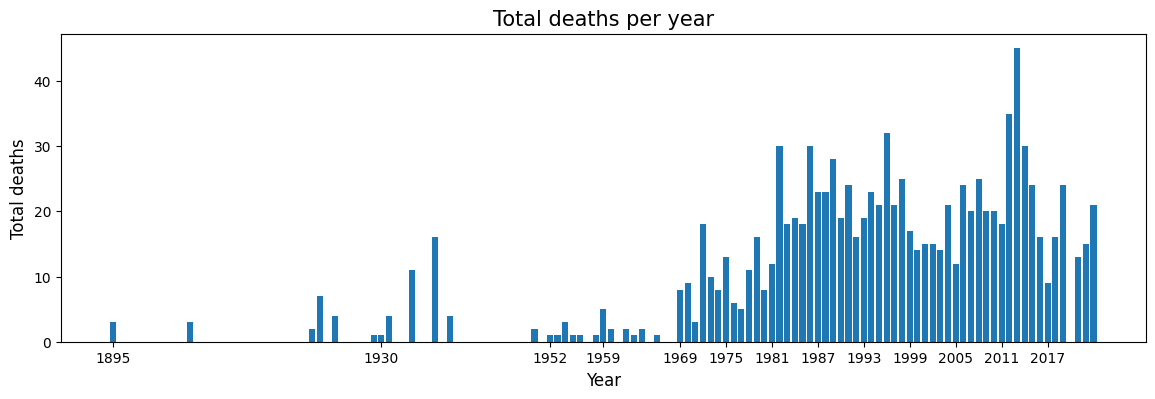

In [4]:
deaths_by_year = df
deaths_by_year['Date'] = pd.to_datetime(deaths_by_year['Date'])
deaths_by_year['Year'] = deaths_by_year['Date'].apply(lambda x: x.year)
x = sorted(deaths_by_year['Year'].tolist())
x = list(set(x))
deaths_by_year = deaths_by_year.groupby('Year')['Name'].count()
deaths_by_year.rename('Number of deaths', inplace=True)
y = deaths_by_year.tolist()

plt.figure(figsize=(14,4))
plt.bar(x,y)
plt.xticks(x[::6])
plt.title('Total deaths per year', fontsize=15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total deaths', fontsize = 12)

plt.show()

In [5]:
#Obtaining some numbers

# max_ind = np.argmax(y)
# y_max = max(y)
# x_max = x[max_ind]
# print(f'In the year {x_max}, we had the maximum number of deaths, which was {y_max}')

# latest_x = x[-1]
# latest_y = y[-1]
# print(latest_x,latest_y)

# no_gaps_avg = sum(y[24:])/len(y[24:])
# print(no_gaps_avg)

# avg_nomax = sum(y[24:max_ind]+y[max_ind+1:])/len(y[24:max_ind]+y[max_ind+1:])
# print(avg_nomax)

# last_five_avg = sum(y[len(y)-5:])/5
# first_five_avg = sum(y[24:29])/5
# print(last_five_avg, first_five_avg)

From this data we can see that we had the maximum number of deaths, 45, in 2013. The most recent year in the data was 2023 and the number of deaths was 21.

Furthermore, we can also see that from 1969 onwards there are no gaps in the data, except for 2020, however this was likely due to COVID and so this gap is not very insightful. This lack of gaps could be due to better data tracking, the increase in popularity of high altitude mountaineering, increased commercialisation of tours making these treks more accessible and many more reasons. Regardless of the reasons for this, the fact there is only one gap from 1969 onwards suggests that this section of data is of higher quality and we should focus our analysis on this section.

Moreover, from 1969 onwards we have an average of 18.5 deaths per year and excluding 2013 (the year of maximum deaths) we have and average of 18 deaths per year.

Finally, we can see that from 1969-1973 there was an average of 9.6 deaths per year and from 2018-2023 (excluding 2020) the average deaths per year was 17.8. This shows an increase, giving evidence to suggest that it is more dangerous now than before to climb these peaks.

---
\\

### Causes of death
---
In this section, we take into account the cause of death. Firstly, I had to clean the 'Cause of death' column since there were too many categories. For example if the cause of death was a fall, there were many variations such as: "100m fall", "fall during descent", "fell" and more. Thus, I needed to group each of these into one catergory - "Fall".

Consequently, we can import the cleaned csv and as reasoned above we only consider data from 1969 onwards, excluding 2020.

In [6]:
df_clean = pd.read_csv('/content/gdrive/MyDrive/Week 7/deaths_on_eight-thousanders_clean.csv')
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='mixed')
df_clean['Year'] = df_clean['Date'].apply(lambda x: x.year)

df_clean = df_clean[df_clean['Year']>=1969]
df_clean = df_clean.sort_values(by='Year')
df_clean.head()

,Date,Name,Nationality,Cause of death,Mountain,Year
165,1969-04-28,David Seidman,United States,Avalanche,Dhaulagiri I,1969
171,1969-04-28,Tenzing,Nepal,Avalanche,Dhaulagiri I,1969
170,1969-04-28,Pemba Phutar,Nepal,Avalanche,Dhaulagiri I,1969
169,1969-04-28,Boyd Everett,United States,Avalanche,Dhaulagiri I,1969
168,1969-04-28,Paul Gerhard,United States,Avalanche,Dhaulagiri I,1969


Now, we consider the total number of deaths by cause of death.

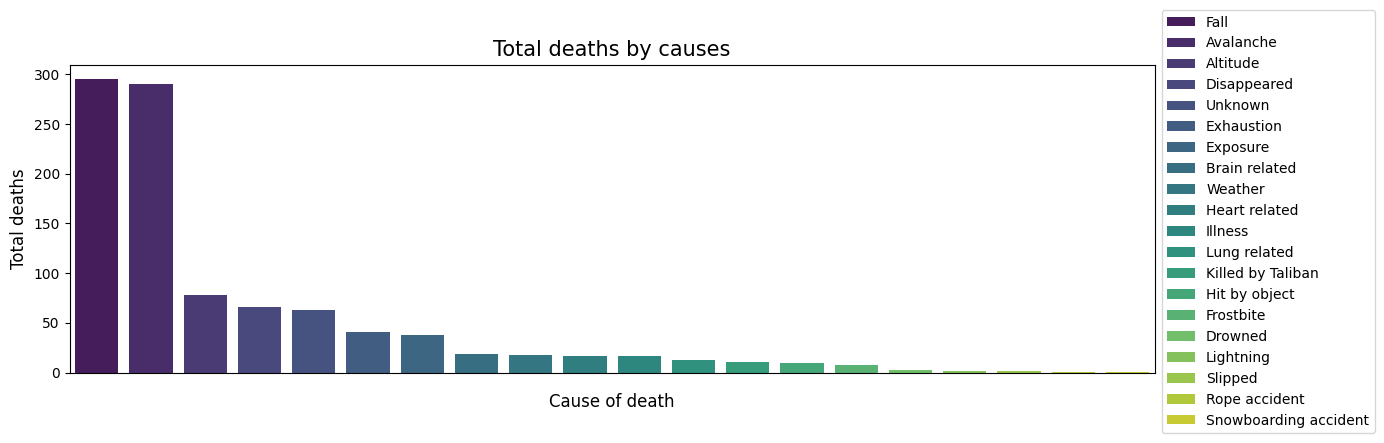

In [7]:
plt.figure(figsize=(14,4))
sns.countplot(x='Cause of death', data=df_clean, legend=True, hue='Cause of death', palette='viridis',
              order=df_clean['Cause of death'].value_counts().index,
              hue_order=df_clean['Cause of death'].value_counts().index)
plt.xlabel('Cause of death', fontsize=12, labelpad=15)
plt.xticks([])
plt.title('Total deaths by causes', fontsize=15)
plt.ylabel('Total deaths', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1,1.2))

plt.show()

From this, we can clearly see that the leading causes of death are avalanches, falls and altitude related problems. As a result, let us now modify our total deaths by year bar plot to a stacked bar plot to visualise the causes of death per year.

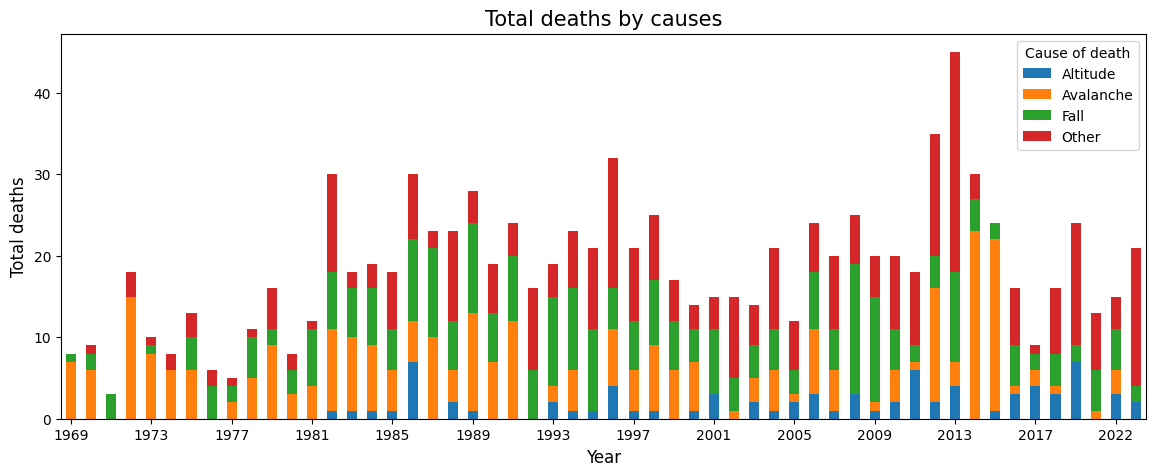

In [8]:
leading_causes = ['Fall','Avalanche','Altitude']
leading_causes_df = df_clean.copy()
leading_causes_df['Cause of death'] = leading_causes_df['Cause of death'].apply(lambda x: x if x in leading_causes else 'Other')

leading_causes_table = pd.pivot_table(leading_causes_df, values='Name', index='Year', columns='Cause of death',
                                      aggfunc='count')

ax = leading_causes_table.plot(kind='bar', stacked=True, figsize=(14,5))
xticks_to_show = leading_causes_table.index[::4]
ax.set_xticks(range(0,54,4))  # Set ticks at these positions
ax.set_xticklabels(xticks_to_show)
plt.xticks(rotation=0)
plt.title('Total deaths by causes', fontsize=15)
plt.ylabel('Total deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)

plt.show()

Perhaps a more insightful plot would be to group each of the leading causes together.

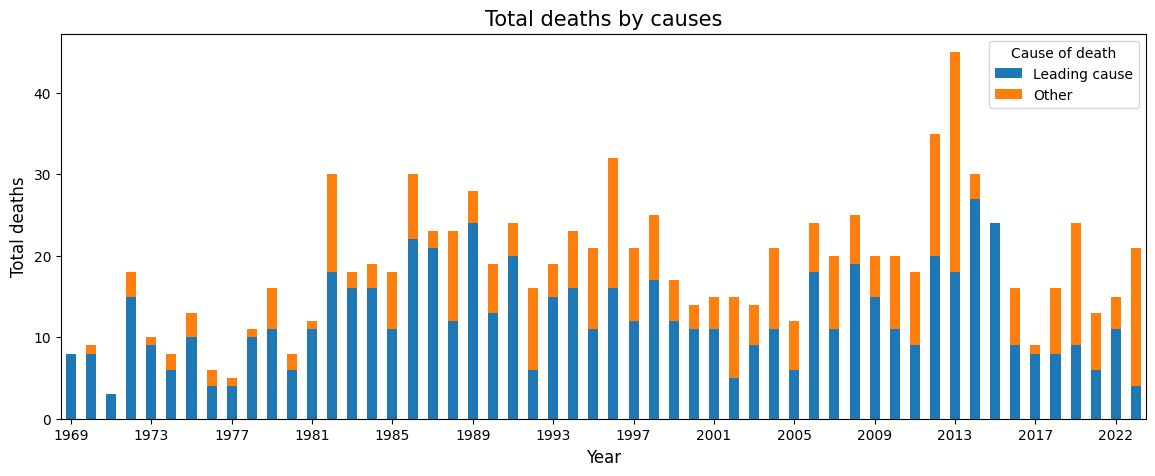

In [9]:
leading_causes_df_tog = df_clean.copy()
leading_causes_df_tog['Cause of death'] = leading_causes_df_tog['Cause of death'].apply(lambda x: 'Leading cause' if x in leading_causes else 'Other')

leading_causes_table = pd.pivot_table(leading_causes_df_tog, values='Name', index='Year', columns='Cause of death',
                                      aggfunc='count')

ax = leading_causes_table.plot(kind='bar', stacked=True, figsize=(14,5))
xticks_to_show = leading_causes_table.index[::4]
ax.set_xticks(range(0,54,4))  # Set ticks at these positions
ax.set_xticklabels(xticks_to_show)
plt.xticks(rotation=0)
plt.title('Total deaths by causes', fontsize=15)
plt.ylabel('Total deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)


plt.show()

In [10]:
#Obtaining some metrics

# leading_causes_table_filled = leading_causes_table.fillna(0)
# leading_causes_table_filled.loc[leading_causes_table_filled['Leading cause']/(leading_causes_table_filled['Leading cause']+leading_causes_table_filled['Other'])>0.5, 'Majority'] = 'Yes'
# maj_years = leading_causes_table_filled['Majority'].count()/leading_causes_table_filled['Leading cause'].count()
# print(maj_years)

# leading_causes_table_filled_recent = leading_causes_table_filled[leading_causes_table_filled.index>=2013]
# leading_causes_table_filled_recent.loc[leading_causes_table_filled_recent['Leading cause']/(leading_causes_table_filled_recent['Leading cause']+leading_causes_table_filled_recent['Other'])>0.5, 'Majority'] = 'Yes'
# maj_years_recent = leading_causes_table_filled_recent['Majority'].count()/leading_causes_table_filled_recent['Leading cause'].count()
# print(maj_years_recent)
# leading_causes_table_filled_recent

For 81.5% of the years from 1969 onwards, the 3 leading causes result in more than 50% of deaths. However from 2013 onwards, we see a decrease to 50% of years which have more than 50% of deaths cause by falls, avalanches or altitude related problems. To explore this further let us zoom in on the stacked bar plot from 2013 onwards and reintroduce all other causes of death.

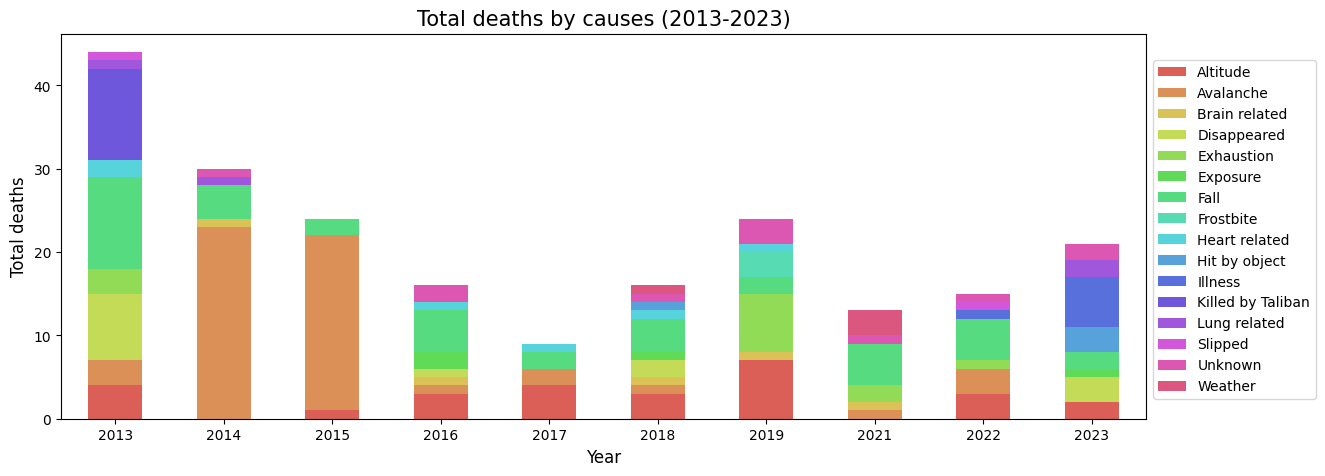

In [11]:
all_causes_recent_df = df_clean[df_clean['Year']>=2013]
all_causes_recent_table = pd.pivot_table(all_causes_recent_df, values='Name', index='Year', columns='Cause of death',
                                      aggfunc='count')

palette = sns.color_palette("hls", n_colors=all_causes_recent_df['Cause of death'].nunique())

all_causes_recent_table.plot(kind='bar', stacked=True, figsize=(14,5), color=palette)
plt.xticks(rotation=0)
plt.title('Total deaths by causes (2013-2023)', fontsize=15)
plt.ylabel('Total deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1,0.95))

plt.show()

From this plot we can see that 2014 and 2015 have a dominant cause of death - avalanches. This is likely due to the fact that there were large avalanches, which occured in 2014 and 2015 that caused major loss of life and disruption to the climbing season. Thus, ignoring these years we can see that all other years have do not have a dominant cause of death. This could be due to a the skill level of mountaineers improving and better avalanche controls and defenses so falling and avalanches are not the dominant causes of death.

---
\\

### Predicting future death numbers
---

Here we will use a linear regression model to try an predict the total number of deaths in the next 5 years.



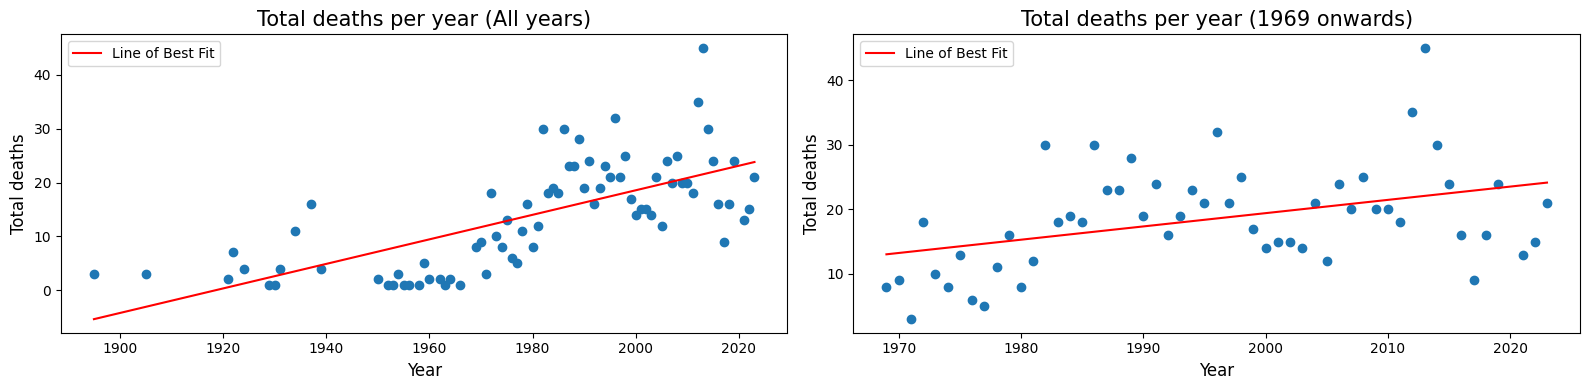

In [12]:
vals1 = linregress(x,y)
m1 = vals1.slope
c1 = vals1.intercept
line1 = []
for i in range(len(x)):
  line1.append(x[i]*m1+c1)

ind_nogaps = x.index(1969)
x_nogaps = x[ind_nogaps:]
y_nogaps = y[ind_nogaps:]

vals2 = linregress(x_nogaps,y_nogaps)
m2 = vals2.slope
c2 = vals2.intercept
line2 = []
for i in range(len(x_nogaps)):
  line2.append(x_nogaps[i]*m2+c2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.scatter(x,y)
ax1.plot(x, line1, color='red', label='Line of Best Fit')
ax1.set_title('Total deaths per year (All years)', fontsize=15)
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Total deaths', fontsize = 12)
ax1.legend()

ax2.scatter(x_nogaps,y_nogaps)
ax2.plot(x_nogaps, line2, color='red', label='Line of Best Fit')
ax2.set_title('Total deaths per year (1969 onwards)', fontsize=15)
ax2.set_xlabel('Year', fontsize = 12)
ax2.set_ylabel('Total deaths', fontsize = 12)
ax2.legend()

plt.tight_layout()

plt.show()

In [13]:
#Computing metrics

# future = range(2024,2029)
# deaths1 = np.round(m1*future+c1,1)
# deaths2 = np.round(m2*future+c2,1)
# print(deaths1, deaths2)

# print((45-c2)/m2)
# print(2124*m2+c2)

The figure on the left shows a line of best fit using all the data and the figure on the right shows a line of best fir using the data from 1969 onwards. Therefore, we have 2 linear regression models to use to try and predict future numbers. Namely, let us define the two lines of best fit:

\begin{align*}
y_l = m_l x_l + c_l\\
y_r = m_r x_r + c_r
\end{align*}

where the subscripts $l$ and $r$ refer to the data and coefficients in the left or right plot respectively. Here using

```
linregress()
```
from `scipy`, we can determine
\begin{align*}
 m_l = 0.23, c_l = -437.45\\
 m_r = 0.21, c_l = -391.79
\end{align*}

As a result, we can use these models to predict the number of deaths for future years. Thus, if we let $x_l, x_r = (2024, 2025, 2026, 2027, 2028)$, i.e. the next 5 years, then  

\begin{align*}
y_l = (24.0, 24.3, 24.5, 24.7, 24.9)\\
y_r = (24.3, 24.6, 24.8, 25.0,  25.2)
\end{align*}

From this, we can see there is not too much of a difference between the 2 models.

Using the right model (model $r$), we can see the models predicts that we will reach the maximum number of total deaths from the current data, which is 45 in 2013, again in 2124. Hence based on this data for the next 100 years, we will not reach that global maximum again. Overall, this model implies a very slow growth, giving evidence to suggest that climbing 8000m peaks is not much more dangerous than it was before.

---

## Conclusion
---

In summary, based on this dataset, in particular the linear regression models and analysing the causes of death in recent years, I would say that it is not more dangerous now than before to climb 8000m peaks.